<img src="Archivos/miad4.jpg" width=800x>

# Laboratorio 2

## Hito: desarrollo de una herramienta analítica usando paquetes especializados para análisis de datos en Python

Este laboratorio corresponde al 34% de la calificación total del curso y su entrega está planteada para el final de la semana 8. Su objetivo es poner en práctica las competencias adquiridas sobre el uso de los paquetes Pandas, Seaborn y Scikit Learn, entre otros, para hacer exploración, análisis descriptivo, y abordar preguntas de negocio para un caso basado en datos reales. 

Especificamente, al desarrollar este laboratorio pondrás a prueba tus habilidades para:

1. Identificar y abordar una pregunta de negocio a partir de un contexto dado.
2. Cargar datos desde archivos utilizando métodos de Pandas.
3. Explorar, manejar, limpiar y agregar DataFrames.
5. Implementar análisis combinando métricas descriptivas, visualización, filtrado y agrupación.
6. Implementar análisis basado en modelos estadísticos o de machine learning.
7. Utilizar paquetes como ipywidgets o panel para agregar interactividad a los análisis de manera sencilla.

Te recomendamos leer por completo el enunciado del laboratorio antes de comenzar, de forma que tengas claro el propósito completo de la actividad, y puedas desarrollar tu solución apuntando a él en cada paso.

##  Contexto: *Desigualdad y factores de éxito en Pruebas "Saber 11" (Colombia)*

El ICFES es el Instituto Colombiano para el Fomento de la Educación Superior y está adscrito al Ministerio de Educación a nivel nacional. Como parte de sus funciones, el ICFES administra las pruebas *Saber 11*, las cuales evalúan a todos los estudiantes del país al final de su educación secundaria. El examen contiene preguntas que evalúan una variedad de áreas del conocimiento (p.ej., matemáticas, ciencias naturales), y se lleva a cabo dos veces al año, respondiendo a los diferentes calendarios académicos que siguen las instituciones educativas. Al momento de inscribirse a las pruebas, los estudiantes deben llenar un formulario que recoge información socio-demográfica y relacionada con la institución a la que pertenecen, con el fin de obtener evidencia respecto al desempeño de los estudiantes en la prueba según sus condiciones particulares.

<img src="Archivos/saberpro.png" width=700x>

Al igual que otros países de la región, Colombia tiene grandes retos en términos de desigualdad, particularmente en el contexto de educación primaria y secundaria. Por esta razón, para el Estado colombiano es muy valioso el amplio registro de datos que el ICFES genera alrededor de las Pruebas Saber 11, pues con ellos se pueden generar análisis sobre la calidad de la educación en el país y eventualmente dar lugar a recomendaciones sobre políticas públicas. En particular, la problemática a abordar en este caso de estudio es *desigualdad y factores de éxito en las pruebas Saber 11*. 

Los objetivos de este caso de estudio son:

* Entender el contenido de los archivos de datos proporcionados sobre las pruebas Saber11, generar un reporte acerca de sus características principales, e identificar qué partes de dicho contenido serán relevantes para el análisis.
* Identificar características de las variables de interés y relaciones entre ellas, por ejemplo, a través de agrupación, visualizaciones, y descriptivos en general.
* Abordar preguntas de negocio relacionadas con la problemática planteada, particularmente con respecto a los factores que puedan incidir significativamente en el puntaje de una persona que presenta la prueba; especialmente aquellos que se relacionen con mal desempeño.
* Generar una herramienta sencilla que permita a un usuario interactuar con alguno de los análisis realizados de forma relevante en el contexto del problema.

# <span style="color:green"> Librerias </span>

In [1]:
# Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine as p9

# Preprocesado y modelado
# ==============================================================================
from datetime import datetime, date
from sklearn.impute import SimpleImputer
from sklearn import linear_model
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.metrics import log_loss
import panel as pn
from scipy.stats import norm

import pandas as pd
pn.extension('plotly')
from ipywidgets import Layout, Button, Box, FloatText, Textarea, Dropdown, Label, IntSlider
import ipywidgets as widgets
from ipywidgets import interactive
from plotly import graph_objs as go
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# 1. Entender el contenido de los archivos de datos

Esta misión consiste en hacerse una idea general del contenido de los datos y seleccionar un segmento de ellos que tenga potencial para los análisis propuestos.

Pautas generales:
* Leer los archivos de datos y agregarlos según sea necesario.
* Inspeccionar el archivo a partir de su encabezado, columnas, descripciones de las variables según su tipo (numéricas, categóricas).
* Definir un sub-conjunto de variables (e.g., una lista) que puedan ser relevantes para la problemática de interés.

Preguntas guía:
* ¿Qué dimensiones tienen los datos?
* ¿Con cuántos años y periodos de evaluación se cuenta?
* ¿Cuáles variables pueden ser de interés para la problemática planteada?
* ¿Qué porcentaje de datos faltantes o no válidos hay en las columnas de interés? ¿Podría eso afectar el análisis, y cómo abordarlo?

Esta misión corresponde a trabajo interno del analista, por lo cual no tiene un entregable para el cliente. Como entregable, puedes generar un reporte básico sobre el contenido de los archivos de datos, ya sea a través de la impresión de mensajes, la presentación de tablas resumen, u otros.

# <span style="color:green"> * Lectura de datos y armonización bases de datos </span>

#### <span style="color:CadetBlue"> El presente estudio se realiza con base en dos años y para cada uno de ellos se realiza con las pruebas Saber 11 realizadas en el primer semestre de cada año, del año 2019 que no existía Pandemia y del año 2020 que existía Pandemia. </span>


In [2]:
SB11_20191= pd.read_csv('C:/Users/Teletrabajo/Desktop/UNIVERSIDAD DE LOS ANDES/1 SEMESTRE/HERRAMIENTAS COMPUTACIONALES/Laboratorio_2/Laboratorio_Final/SB11_20191.txt', error_bad_lines=False, sep = "¬", encoding='utf8' )
SB11_20211= pd.read_csv('C:/Users/Teletrabajo/Desktop/UNIVERSIDAD DE LOS ANDES/1 SEMESTRE/HERRAMIENTAS COMPUTACIONALES/Laboratorio_2/Laboratorio_Final/SB11_20211.txt', error_bad_lines=False, sep = "¬", encoding='utf8' )
SB11_20191.head()
print("Dimesiones Base de datos 2021_1", SB11_20191.shape)

Dimesiones Base de datos 2021_1 (21083, 82)


In [3]:
SB11_20211.head()
print("Dimesiones Base de datos 2021_1", SB11_20211.shape)

Dimesiones Base de datos 2021_1 (15528, 78)


#### <span style="color:CadetBlue"> Las dimensiones de la base Saber 11 del año 2019_1 es de 82 columnas y 21.083 registros o filas, del año 2021_1 contiene 78 columnas y 15.528 registros. Se evidencia que en un año de pandemia (2021) existen 5.555 menos pruebas que un año que no existía pandemia (2019). </span>

# <span style="color:green"> * Definición y Subconjunto de variables relevantes de interés: </span>

#### <span style="color:CadetBlue"> En primera medida se observa que variables son de interés para describir el puntaje de la prueba de cada alumno, por consiguiente se revisa los primeros 5 registros de la base de datos.</span>

In [4]:
SB11_20191.head()

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_TIENEETNIA,ESTU_ETNIA,...,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E
0,TI,COLOMBIA,F,07/12/2000,20191,SB11201910008548,ESTUDIANTE,COLOMBIA,No,NaN,...,54,39,A1,235,29,58.199483,3.0,3.0,PUBLICAR,NO
1,CC,COLOMBIA,F,23/03/1998,20191,SB11201910004475,ESTUDIANTE,COLOMBIA,No,NaN,...,35,10,A-,217,21,51.018527,2.0,3.0,PUBLICAR,NO
2,TI,COLOMBIA,M,22/03/2001,20191,SB11201910011427,ESTUDIANTE,COLOMBIA,No,NaN,...,49,32,A1,246,34,50.855657,2.0,3.0,PUBLICAR,NO
3,CC,COLOMBIA,M,16/06/1994,20191,SB11201910041975,ESTUDIANTE,COLOMBIA,No,NaN,...,64,55,A2,255,38,52.688203,3.0,3.0,PUBLICAR,NO
4,CC,COLOMBIA,F,21/09/2000,20191,SB11201910014490,ESTUDIANTE,COLOMBIA,No,NaN,...,71,64,B1,280,48,73.930829,4.0,4.0,PUBLICAR,NO


#### <span style="color:CadetBlue"> Se define la variable de interés EDAD y se calcula a partir de la Fecha de Nacimiento </span>

In [5]:
def age(x):
    x = datetime.strptime(x, "%d/%m/%Y").date()
    today = date.today()
    return today.year - x.year - ((today.month, 
                                      today.day) < (x.month, 
                                                    x.day))
SB11_20191['EDAD'] = SB11_20191['ESTU_FECHANACIMIENTO'].apply(age)
display(SB11_20191)

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_TIENEETNIA,ESTU_ETNIA,...,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E,EDAD
0,TI,COLOMBIA,F,07/12/2000,20191,SB11201910008548,ESTUDIANTE,COLOMBIA,No,NaN,...,39,A1,235,29,58.199483,3.0,3.0,PUBLICAR,NO,20
1,CC,COLOMBIA,F,23/03/1998,20191,SB11201910004475,ESTUDIANTE,COLOMBIA,No,NaN,...,10,A-,217,21,51.018527,2.0,3.0,PUBLICAR,NO,23
2,TI,COLOMBIA,M,22/03/2001,20191,SB11201910011427,ESTUDIANTE,COLOMBIA,No,NaN,...,32,A1,246,34,50.855657,2.0,3.0,PUBLICAR,NO,20
3,CC,COLOMBIA,M,16/06/1994,20191,SB11201910041975,ESTUDIANTE,COLOMBIA,No,NaN,...,55,A2,255,38,52.688203,3.0,3.0,PUBLICAR,NO,27
4,CC,COLOMBIA,F,21/09/2000,20191,SB11201910014490,ESTUDIANTE,COLOMBIA,No,NaN,...,64,B1,280,48,73.930829,4.0,4.0,PUBLICAR,NO,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21078,TI,COLOMBIA,F,06/10/2002,20191,SB11201910016389,ESTUDIANTE,COLOMBIA,No,NaN,...,47,A2,281,48,61.528482,3.0,3.0,PUBLICAR,NO,19
21079,TI,COLOMBIA,F,03/02/2002,20191,SB11201910016418,ESTUDIANTE,COLOMBIA,No,NaN,...,48,A2,273,45,50.963043,2.0,3.0,PUBLICAR,NO,19
21080,TI,COLOMBIA,M,17/04/2003,20191,SB11201910016407,ESTUDIANTE,COLOMBIA,No,NaN,...,54,A2,294,54,60.603929,3.0,3.0,PUBLICAR,NO,18
21081,TI,COLOMBIA,M,14/06/2002,20191,SB11201910016424,ESTUDIANTE,COLOMBIA,No,NaN,...,59,A2,287,51,64.740929,4.0,3.0,PUBLICAR,NO,19


In [6]:
SB11_20211['EDAD'] = SB11_20211['ESTU_FECHANACIMIENTO'].apply(age)
display(SB11_20211)

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,...,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_ESPECIAL_GLOBAL,PERCENTIL_GLOBAL,ESTU_ESTADOINVESTIGACION,EDAD
0,TI,COLOMBIA,M,05/11/2003,20211,SB11202110042506,ESTUDIANTE,COLOMBIA,No,VALLE,...,40,3,61.0,35.0,A2,303,NaN,46.0,PUBLICAR,18
1,TI,COLOMBIA,F,06/10/2004,20211,SB11202110041799,ESTUDIANTE,COLOMBIA,No,VALLE,...,53,3,69.0,45.0,B1,325,NaN,62.0,PUBLICAR,17
2,TI,COLOMBIA,F,01/10/2003,20211,SB11202110043835,ESTUDIANTE,COLOMBIA,No,VALLE,...,90,4,69.0,46.0,B1,374,NaN,92.0,PUBLICAR,18
3,TI,COLOMBIA,F,13/01/2003,20211,SB11202110043668,ESTUDIANTE,COLOMBIA,No,VALLE,...,32,2,60.0,33.0,A2,282,NaN,34.0,PUBLICAR,18
4,TI,COLOMBIA,F,29/08/2004,20211,SB11202110043350,ESTUDIANTE,COLOMBIA,No,VALLE,...,34,2,60.0,33.0,A2,288,NaN,38.0,PUBLICAR,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15523,CC,COLOMBIA,F,02/01/2003,20211,SB11202110039404,ESTUDIANTE,COLOMBIA,No,CESAR,...,5,1,33.0,3.0,A-,179,NaN,3.0,PUBLICAR,18
15524,TI,COLOMBIA,F,03/04/2004,20211,SB11202110038427,ESTUDIANTE,COLOMBIA,No,VALLE,...,26,2,57.0,28.0,A1,254,NaN,21.0,PUBLICAR,17
15525,TI,COLOMBIA,M,06/06/2004,20211,SB11202110038394,ESTUDIANTE,COLOMBIA,No,VALLE,...,43,3,56.0,25.0,A1,303,NaN,46.0,PUBLICAR,17
15526,TI,COLOMBIA,F,14/01/2004,20211,SB11202110038872,ESTUDIANTE,COLOMBIA,No,VALLE,...,24,2,62.0,35.0,A2,285,NaN,36.0,PUBLICAR,17


#### <span style="color:CadetBlue"> Se seleccionan las variables que tienen sentido lógico de influir en la variable puntaje total tanto de la base del año 2019 y 2021.</span>

In [7]:
SB11_20191_Sub = SB11_20191[['ESTU_GENERO',
                            'PERIODO',
                            'ESTU_TIENEETNIA',
                            'ESTU_DEPTO_RESIDE',
                            'FAMI_ESTRATOVIVIENDA',
                            'FAMI_PERSONASHOGAR',
                            'FAMI_EDUCACIONPADRE',
                            'FAMI_EDUCACIONMADRE',
                            'FAMI_TRABAJOLABORPADRE',
                            'FAMI_TRABAJOLABORMADRE',
                            'FAMI_TIENEINTERNET',
                            'FAMI_TIENEMOTOCICLETA',
                            'FAMI_NUMLIBROS',
                            'FAMI_COMELECHEDERIVADOS',
                            'FAMI_COMECARNEPESCADOHUEVO',
                            'FAMI_SITUACIONECONOMICA',
                            'ESTU_DEDICACIONLECTURADIARIA',
                            'ESTU_DEDICACIONINTERNET',
                            'ESTU_TIPOREMUNERACION',
                            'COLE_BILINGUE',
                            'COLE_CARACTER',
                            'COLE_AREA_UBICACION',
                            'COLE_JORNADA',
                            'EDAD',
                            'PUNT_GLOBAL']]

In [8]:
SB11_20211_Sub=SB11_20211[['ESTU_GENERO',
                            'PERIODO',
                            'ESTU_TIENEETNIA',
                            'ESTU_DEPTO_RESIDE',
                            'FAMI_ESTRATOVIVIENDA',
                            'FAMI_PERSONASHOGAR',
                            'FAMI_EDUCACIONPADRE',
                            'FAMI_EDUCACIONMADRE',
                            'FAMI_TRABAJOLABORPADRE',
                            'FAMI_TRABAJOLABORMADRE',
                            'FAMI_TIENEINTERNET',
                            'FAMI_TIENEMOTOCICLETA',
                            'FAMI_NUMLIBROS',
                            'FAMI_COMELECHEDERIVADOS',
                            'FAMI_COMECARNEPESCADOHUEVO',
                            'FAMI_SITUACIONECONOMICA',
                            'ESTU_DEDICACIONLECTURADIARIA',
                            'ESTU_DEDICACIONINTERNET',
                            'ESTU_TIPOREMUNERACION',
                            'COLE_BILINGUE',
                            'COLE_CARACTER',
                            'COLE_AREA_UBICACION',
                            'COLE_JORNADA',
                            'EDAD',
                            'PUNT_GLOBAL']]

#### <span style="color:CadetBlue"> Se realiza la unión de las bases de datos teniendo una dimensión final de 36.611 registros y 25  Variables.</span>

In [9]:
df=SB11_20211_Sub.append(SB11_20191_Sub, ignore_index = True)

In [10]:
df.shape

(36611, 25)

# <span style="color:green"> * Descripciones de las variables según su tipo (numéricas, categóricas). </span>

#### <span style="color:CadetBlue"> A continuación se revisa el tipo de objetos a la cual pertenece cada variable de la base más grande que es equivalente. </span>

In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36611 entries, 0 to 36610
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   ESTU_GENERO                   36606 non-null  object
 1   PERIODO                       36611 non-null  int64 
 2   ESTU_TIENEETNIA               34903 non-null  object
 3   ESTU_DEPTO_RESIDE             36586 non-null  object
 4   FAMI_ESTRATOVIVIENDA          34434 non-null  object
 5   FAMI_PERSONASHOGAR            35271 non-null  object
 6   FAMI_EDUCACIONPADRE           34582 non-null  object
 7   FAMI_EDUCACIONMADRE           34588 non-null  object
 8   FAMI_TRABAJOLABORPADRE        35164 non-null  object
 9   FAMI_TRABAJOLABORMADRE        35205 non-null  object
 10  FAMI_TIENEINTERNET            34556 non-null  object
 11  FAMI_TIENEMOTOCICLETA         35173 non-null  object
 12  FAMI_NUMLIBROS                33932 non-null  object
 13  FAMI_COMELECHEDE

#### <span style="color:CadetBlue"> Se evidencia que el campo de periodo esta en formato entero, por consiguiente se pasa a categórico. </span>

In [12]:
df['PERIODO'] = pd.Categorical(df['PERIODO'])


In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36611 entries, 0 to 36610
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   ESTU_GENERO                   36606 non-null  object  
 1   PERIODO                       36611 non-null  category
 2   ESTU_TIENEETNIA               34903 non-null  object  
 3   ESTU_DEPTO_RESIDE             36586 non-null  object  
 4   FAMI_ESTRATOVIVIENDA          34434 non-null  object  
 5   FAMI_PERSONASHOGAR            35271 non-null  object  
 6   FAMI_EDUCACIONPADRE           34582 non-null  object  
 7   FAMI_EDUCACIONMADRE           34588 non-null  object  
 8   FAMI_TRABAJOLABORPADRE        35164 non-null  object  
 9   FAMI_TRABAJOLABORMADRE        35205 non-null  object  
 10  FAMI_TIENEINTERNET            34556 non-null  object  
 11  FAMI_TIENEMOTOCICLETA         35173 non-null  object  
 12  FAMI_NUMLIBROS                33932 non-null  

#### <span style="color:CadetBlue"> A continuación se revisa cuantos datos nulos existen en la base de datos.</span>

In [14]:
df.isnull().sum()

ESTU_GENERO                        5
PERIODO                            0
ESTU_TIENEETNIA                 1708
ESTU_DEPTO_RESIDE                 25
FAMI_ESTRATOVIVIENDA            2177
FAMI_PERSONASHOGAR              1340
FAMI_EDUCACIONPADRE             2029
FAMI_EDUCACIONMADRE             2023
FAMI_TRABAJOLABORPADRE          1447
FAMI_TRABAJOLABORMADRE          1406
FAMI_TIENEINTERNET              2055
FAMI_TIENEMOTOCICLETA           1438
FAMI_NUMLIBROS                  2679
FAMI_COMELECHEDERIVADOS         2326
FAMI_COMECARNEPESCADOHUEVO      2112
FAMI_SITUACIONECONOMICA         1455
ESTU_DEDICACIONLECTURADIARIA    2086
ESTU_DEDICACIONINTERNET         2122
ESTU_TIPOREMUNERACION           1498
COLE_BILINGUE                   6667
COLE_CARACTER                   2344
COLE_AREA_UBICACION                0
COLE_JORNADA                       0
EDAD                               0
PUNT_GLOBAL                        0
dtype: int64

#### <span style="color:CadetBlue"> Dado que el porcentaje de faltantes de la variable Edad es del 57% y la variable de Colegio Bilingüe es del 18% se procede a eliminar dichas variables.</span>

In [15]:
df1=df.drop(['EDAD','COLE_BILINGUE'], axis=1)

In [16]:
ft = (sum(df1.isnull().sum().values)/(36611*24))
ft

0.03673190206950552

#### <span style="color:CadetBlue"> Datos que el porcentaje de faltantes es del 3.6% se procede a realizar la imputación de datos. </span>

In [17]:
df_na = df1.dropna(how = "any")
df_na.shape

(29080, 23)

# <span style="color:green"> RESUMEN </span>

### <span style="color:CadetBlue"> * Inicialmente se realizó el cargue de las bases de la datos Saber 11 del año 2019 y 2021, con fin de poder contrarrestar los efectos de la pandemia.</span>

### <span style="color:CadetBlue"> * Después se realiza la selección de variables de interés que en un sentido lógico influyeran puntaje total.</span>

### <span style="color:CadetBlue"> * Se agrupo las bases de datos y se calcula la Edad a partir de la fecha de nacimiento.</span>

### <span style="color:CadetBlue"> * Se realizó el cambio de formato de datos para la variable de PERIODO.</span>

### <span style="color:CadetBlue"> * Se evidencia los datos faltantes y al ver que la variable de EDAD Y COLEGIO BILINGÜE eran bastantes, se eliminar dichas variables.</span>

### <span style="color:CadetBlue"> * Finalmente la base de datos agrupada queda con 29.080 registros y 23 columnas, sin datos faltantes y en dos años con los periodos del 1 semestre. Estas fueron las variables seleccionadas:
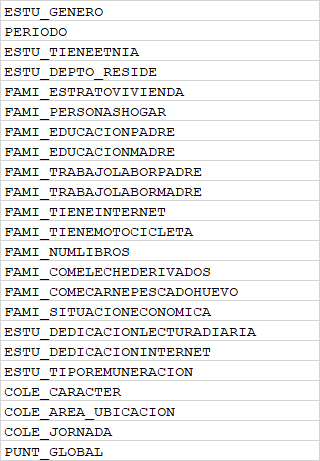
</span>

# 2. Identificar características y relaciones en las variables

Esta misión consiste en utilizar análisis descriptivos para explorar patrones o relaciones en las variables de interés para la problemática planteada.

Pautas generales:
* Utilizar Matplotlib y/o Seaborn para inspeccionar visualmente variables de interés; los métodos `distplot`, `pairplot`, `boxplot`, o `violinplot`, entre otros, pueden ser de utilidad.
* Utilizar el método `groupby` de Pandas, en conjunto con la visualización, para proveer evidencia sobre el impacto de variables socio-demográficas de interés sobre el desempeño de los estudiantes en la prueba.

Preguntas guía:
* ¿Hay patrones de interés en las distribuciones de las variables, o en las relaciones entre ellas?
* ¿Existe algún impacto significativo de variables socio-demográficas en los puntajes globales o por área?
* ¿Sobre cuáles variables vale la pena hacer un análisis más profundo?

El entregable de esta misión es un reporte (p.ej., un conjunto de visualizaciones) que de cuenta de los comportamientos más interesantes que se observen en las variables de interés para el contexto propuesto. El propósito de esta exploración es generar hipótesis o preguntas que guíen análisis más profundos. En ese sentido, con base en lo aprendido en esta sección, identifique las tres preguntas analíticas que plantearía con mayor prioridad, teniendo en cuenta el contexto y los datos disponibles; estas preguntas NO se deben abordar en términos de código para el laboratorio (únicamente formularse).

## <span style="color:green"> Análisis de Puntaje Global por Periodo </span>

In [18]:
df_na.groupby(['PERIODO']).mean()['PUNT_GLOBAL'].sort_values()

PERIODO
20191    291.004739
20211    312.074344
Name: PUNT_GLOBAL, dtype: float64

<AxesSubplot:xlabel='PERIODO', ylabel='PUNT_GLOBAL'>

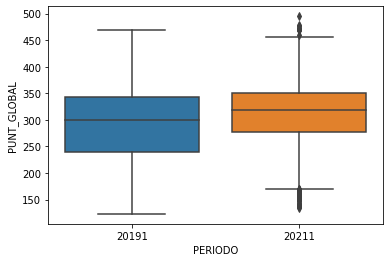

In [19]:
sns.boxplot( y=df_na["PUNT_GLOBAL"], x=df_na["PERIODO"] )

### <span style="color:CadetBlue"> Se evidencia que los puntajes obtenidos en el periodo de pandemia 2021_1 son mejores que los Pre Pandemia, el promedio de los puntajes Pre Pandemia fue de 291, en cambio los puntajes en Pandemia fueron de 312, además los resultados en Pre pandemia son más variables. </span>

## <span style="color:green"> Análisis de Puntaje Global por Jornada y Area de Colegio </span>

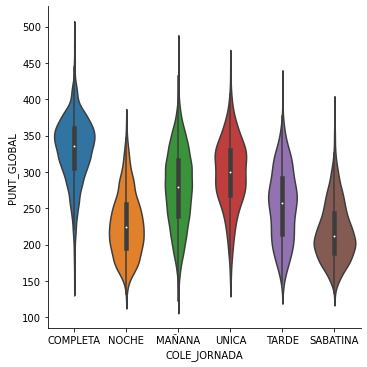

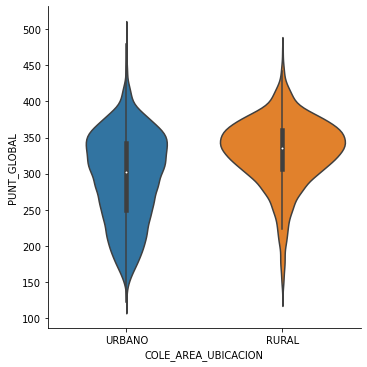

In [20]:
sns.catplot(x = "COLE_JORNADA", y = "PUNT_GLOBAL", data = df_na, kind = "violin")
sns.catplot(x = "COLE_AREA_UBICACION", y = "PUNT_GLOBAL", data = df_na, kind = "violin")

### <span style="color:CadetBlue"> Los gráficos anteriores indican que la jordana de la noche y sabatina tienden a tener puntajes en la prueba más deficientes. También sobresalen los resultados de la jornada completa y por último se evidencia como en las áreas urbanas se generan mayor variabilidad entre los puntajes</span>

## <span style="color:green"> Análisis de Puntaje Global por Estrato </span>

<AxesSubplot:xlabel='FAMI_ESTRATOVIVIENDA', ylabel='PUNT_GLOBAL'>

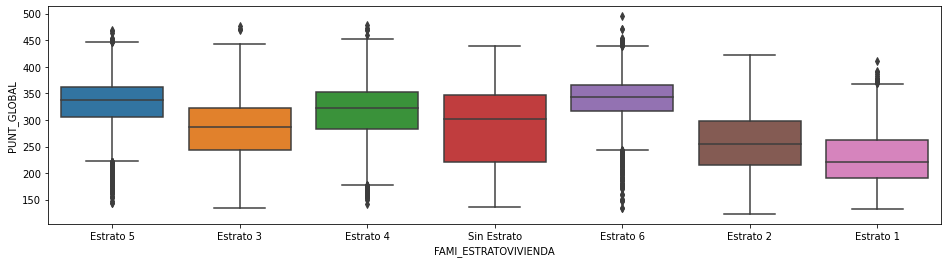

In [21]:
plt.figure(figsize=(16,4))
sns.boxplot( y=df_na["PUNT_GLOBAL"], x=df_na["FAMI_ESTRATOVIVIENDA"] )

### <span style="color:CadetBlue"> Los estratos 1 y 2 tienen los puntajes más bajos y para los estratos 3 y 4 los puntajes son más altos, de aquí se genera la idea que la hipótesis de variable estrato es un diferencial en los puntajes de la prueba Saber 11.</span>

## <span style="color:green"> Análisis de Frecuencia por Trabajo de Padre y Madre </span>

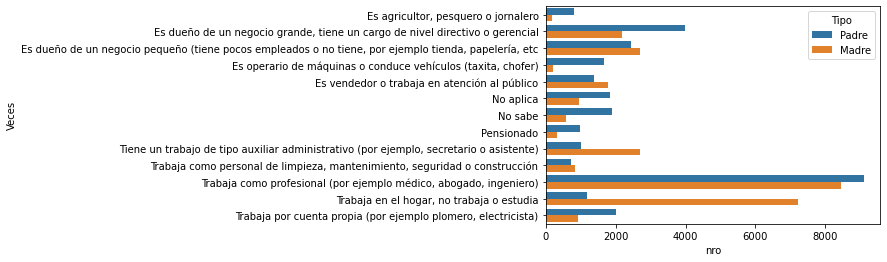

In [22]:
df_na['FAMI_TRABAJOLABORPADRE'].unique()
Padre=df_na[["FAMI_TRABAJOLABORPADRE", "PERIODO"]].groupby(["FAMI_TRABAJOLABORPADRE"]).count()
Madre=df_na[["FAMI_TRABAJOLABORMADRE", "PERIODO"]].groupby(["FAMI_TRABAJOLABORMADRE"]).count()
Padre2= pd.merge(Padre,Madre, left_index=True,right_index=True, how='inner')
Padre2=Padre2.rename_axis('Veces').reset_index()
Padre2=Padre2.rename(columns={'PERIODO_x':'Padre','PERIODO_y':'Madre'})
Padre2=Padre2.melt(id_vars=['Veces'], var_name = 'Tipo', value_name = 'nro')
plt.figure()
sns.barplot(y = "Veces", x = "nro", hue = "Tipo", data =Padre2)
plt.show();


### <span style="color:CadetBlue"> Se observa que las Madres trabajan preferencialmente en labores del Hogar en cambio los Padres trabajan en su mayoría como profesionales. También se evidencia que las Madres trabajan menos en laborales como dueños de negocio grande o cargos directivos.</span>

## <span style="color:green"> Análisis Porcentual de Educación del Padre y Madre por Periodos </span>

In [23]:
pd.crosstab(index=df_na['PERIODO'], columns=df_na['FAMI_EDUCACIONPADRE']
           ).apply(lambda r: r/r.sum() *100,
                                axis=1)

FAMI_EDUCACIONPADRE,Educación profesional completa,Educación profesional incompleta,Ninguno,No Aplica,No sabe,Postgrado,Primaria completa,Primaria incompleta,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Técnica o tecnológica completa,Técnica o tecnológica incompleta
PERIODO,,,,,,,,,,,,
20191,27.387441,3.631517,1.783175,1.084123,5.947867,17.227488,4.129147,7.363744,15.219194,7.683649,6.658768,1.883886
20211,36.032787,4.155738,0.426230,0.934426,6.918033,22.442623,1.500000,2.000000,12.680328,4.967213,6.155738,1.786885


In [24]:
pd.crosstab(index=df_na['PERIODO'], columns=df_na['FAMI_EDUCACIONMADRE']
           ).apply(lambda r: r/r.sum() *100,
                                axis=1)

FAMI_EDUCACIONMADRE,Educación profesional completa,Educación profesional incompleta,Ninguno,No Aplica,No sabe,Postgrado,Primaria completa,Primaria incompleta,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Técnica o tecnológica completa,Técnica o tecnológica incompleta
PERIODO,,,,,,,,,,,,
20191,31.682464,4.170616,1.072275,0.242891,2.57109,15.610190,3.815166,5.965640,16.190758,7.020142,8.975118,2.683649
20211,42.237705,5.286885,0.229508,0.237705,3.92623,20.729508,0.918033,1.303279,11.926230,3.327869,7.573770,2.303279


### <span style="color:CadetBlue"> Se evidencia como porcentualmente los estudiantes cuyos madres y padres tienen primaria para el año de pandemia disminuyeron su participación en la presentación de las pruebas Saber 11. También se evidencia como porcentualmente los estudiantes cuyos padres y madres tienen profesional completa y postgrados, tienen mayor participación en la presentación de la prueba Saber 11 en el año de Pandemia.</span>

# <span style="color:green"> RESUMEN </span>

### <span style="color:CadetBlue"> * Los puntajes obtenidos en el periodo de pandemia 2021_1 son mejores que los Pre Pandemia, el promedio de los puntajes Pre Pandemia fue de 291, en cambio los puntajes en Pandemia fueron de 312, además los resultados en Pre pandemia son más variables.</span>

### <span style="color:CadetBlue"> * La jordana de la noche y sabatina tienden a tener puntajes en la prueba más deficientes. También sobresalen los resultados de la jornada completa y por último se evidencia como en las áreas urbanas se generan mayor variabilidad entre los puntajes.</span>

### <span style="color:CadetBlue"> * Los estratos 1 y 2 tienen los puntajes más bajos y para los estratos 3 y 4 los puntajes son más altos, de aquí se genera la idea que la hipótesis de variable estrato es un diferencial en los puntajes de la prueba Saber 11.</span>

### <span style="color:CadetBlue"> * Las Madres trabajan preferencialmente en labores del Hogar en cambio los Padres trabajan en su mayoría como profesionales. También se evidencia que las Madres trabajan menos en laborales como dueños de negocio grande o cargos directivos.</span>

### <span style="color:CadetBlue"> * Porcentualmente los estudiantes cuyos madres y padres tienen primaria para el año de pandemia disminuyeron su participación en la presentación de las pruebas Saber 11. También se evidencia como porcentualmente los estudiantes cuyos padres y madres tienen profesional completa y postgrados, tienen mayor participación en la presentación de la prueba Saber 11 en el año de Pandemia.</span>


# 3. Abordar preguntas de negocio planteadas

Esta misión consiste en proponer, implementar y evaluar el desempeño modelo(s) que busque(n) explicar las relaciones entre factores socio-demográficos y desempeño en la prueba.

Pautas generales:
* Seleccionar variables y proponer modelos acordes a dichas variables y al contexto del problema.
* Utilizar los paquetes StatsModels y Scikit Learn para indagar sobre los aspectos que contribuyen al éxito de los estudiantes. Particularmente, las clases correspondientes a regresión lineal y regresión logística, entre otras, pueden ser útiles.
* Utilizar las métricas de evaluación de desempeño (disponibles en los paquetes mencionados), para concluir sobre la validez de los modelos propuestos.

Preguntas guía:
* ¿Existe algún sub-conjunto de variables socio-demográficas que explique razonablemente bien el desempeño de los estudiantes en la prueba?
* Definiendo como "estudiante en riesgo" a quien tenga un puntaje por debajo del percentil $\alpha$ en más de la mitad de las áreas de la prueba, ¿cuáles variables socio-demográficas permitirían "predecir" si un estudiante pertenecerá a dicho grupo?

El entregable de esta misión es un reporte sobre el desempeño de los modelos propuestos para abordar al menos una de las preguntas guía planteadas, acompañado de una conclusión sobre los resultados del modelo (si son válidos) en el contexto de la problemática planteada.

## <span style="color:green"> Creación Variable de Interés (Y) </span>

### <span style="color:CadetBlue">Para los jóvenes que presentan la prueba Saber 11  es muy interesante ser becado o ingresar a la Universidad Nacional, en diferentes artículos de internet refieren que con un puntaje mayor a 350 es muy posible ingresar a la Universidad Nacional o ser becado en varias de las Universidades Colombianas, por consiguiente es de interés saber cuáles son las características de los estudiantes que han tenido pruebas Saber 11 con puntajes mayores a 350, para lo cual se crea nuestra variable de interés y.</span>

In [25]:
df_na["y"] = (df_na["PUNT_GLOBAL"] > 350)*1
df_na["y"] = pd.Categorical(df_na["y"])
df_na.head()

,ESTU_GENERO,PERIODO,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,...,FAMI_COMECARNEPESCADOHUEVO,FAMI_SITUACIONECONOMICA,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,ESTU_TIPOREMUNERACION,COLE_CARACTER,COLE_AREA_UBICACION,COLE_JORNADA,PUNT_GLOBAL,y
0,M,20211,No,VALLE,Estrato 5,1 a 2,No sabe,Secundaria (Bachillerato) completa,No sabe,Trabaja por cuenta propia (por ejemplo plomero...,...,3 a 5 veces por semana,Igual,No leo por entretenimiento,Más de 3 horas,No,ACADÉMICO,URBANO,COMPLETA,303,0
1,F,20211,No,VALLE,Estrato 3,3 a 4,Educación profesional incompleta,Secundaria (Bachillerato) completa,"Es dueño de un negocio grande, tiene un cargo ...","Trabaja en el hogar, no trabaja o estudia",...,Todos o casi todos los días,Igual,No leo por entretenimiento,Entre 1 y 3 horas,No,ACADÉMICO,URBANO,COMPLETA,325,0
2,F,20211,No,VALLE,Estrato 3,3 a 4,Educación profesional completa,Educación profesional completa,"Trabaja como profesional (por ejemplo médico, ...","Trabaja como profesional (por ejemplo médico, ...",...,Todos o casi todos los días,Igual,Entre 30 y 60 minutos,Entre 30 y 60 minutos,No,ACADÉMICO,URBANO,COMPLETA,374,1
3,F,20211,No,VALLE,Estrato 4,5 a 6,Educación profesional completa,Educación profesional completa,"Trabaja como profesional (por ejemplo médico, ...","Trabaja en el hogar, no trabaja o estudia",...,3 a 5 veces por semana,Peor,No leo por entretenimiento,Entre 30 y 60 minutos,"Si, en efectivo",ACADÉMICO,URBANO,COMPLETA,282,0
4,F,20211,No,VALLE,Estrato 5,5 a 6,Primaria completa,Secundaria (Bachillerato) completa,"Es dueño de un negocio grande, tiene un cargo ...",Tiene un trabajo de tipo auxiliar administrati...,...,1 o 2 veces por semana,Igual,Entre 30 y 60 minutos,Entre 1 y 3 horas,No,ACADÉMICO,URBANO,COMPLETA,288,0


In [26]:
df_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29080 entries, 0 to 36588
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   ESTU_GENERO                   29080 non-null  object  
 1   PERIODO                       29080 non-null  category
 2   ESTU_TIENEETNIA               29080 non-null  object  
 3   ESTU_DEPTO_RESIDE             29080 non-null  object  
 4   FAMI_ESTRATOVIVIENDA          29080 non-null  object  
 5   FAMI_PERSONASHOGAR            29080 non-null  object  
 6   FAMI_EDUCACIONPADRE           29080 non-null  object  
 7   FAMI_EDUCACIONMADRE           29080 non-null  object  
 8   FAMI_TRABAJOLABORPADRE        29080 non-null  object  
 9   FAMI_TRABAJOLABORMADRE        29080 non-null  object  
 10  FAMI_TIENEINTERNET            29080 non-null  object  
 11  FAMI_TIENEMOTOCICLETA         29080 non-null  object  
 12  FAMI_NUMLIBROS                29080 non-null  

In [27]:
pd.value_counts(df_na['y'])

0    22576
1     6504
Name: y, dtype: int64

### <span style="color:CadetBlue">Se evidencia que de la base de datos compuesta por 29.080 datos, 6.504 datos cumplen la caracteristica de ser puntajes mayores a 6.504, es decir 22.4%.</span>

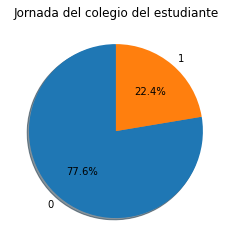

In [28]:
data = df_na['y'].value_counts()/df_na['y'].value_counts().sum()
plt.pie(data, labels = data.index, autopct='%1.1f%%', shadow = 'True' , startangle = 90)
plt.title('Jornada del colegio del estudiante');

### <span style="color:CadetBlue"> Se elimina la variable de Puntaje Global ya que se convirtió en una variable categórica mayor a 350, también para evitar problemas de multicolinealidad en el modelo.</span>

In [29]:
df_na2= df_na.drop(['PUNT_GLOBAL'], axis=1)
df_na2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29080 entries, 0 to 36588
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   ESTU_GENERO                   29080 non-null  object  
 1   PERIODO                       29080 non-null  category
 2   ESTU_TIENEETNIA               29080 non-null  object  
 3   ESTU_DEPTO_RESIDE             29080 non-null  object  
 4   FAMI_ESTRATOVIVIENDA          29080 non-null  object  
 5   FAMI_PERSONASHOGAR            29080 non-null  object  
 6   FAMI_EDUCACIONPADRE           29080 non-null  object  
 7   FAMI_EDUCACIONMADRE           29080 non-null  object  
 8   FAMI_TRABAJOLABORPADRE        29080 non-null  object  
 9   FAMI_TRABAJOLABORMADRE        29080 non-null  object  
 10  FAMI_TIENEINTERNET            29080 non-null  object  
 11  FAMI_TIENEMOTOCICLETA         29080 non-null  object  
 12  FAMI_NUMLIBROS                29080 non-null  

### <span style="color:CadetBlue"> Se seleccionan las covariables y la variable de interés.</span>

In [30]:
df_na2= pd.get_dummies(df_na2, columns=["ESTU_GENERO",
                                "PERIODO",
                                "ESTU_TIENEETNIA",
                                "ESTU_DEPTO_RESIDE",
                                "FAMI_ESTRATOVIVIENDA",
                                "FAMI_PERSONASHOGAR",
                                "FAMI_EDUCACIONPADRE",
                                "FAMI_EDUCACIONMADRE",
                                "FAMI_TRABAJOLABORPADRE",
                                "FAMI_TRABAJOLABORMADRE",
                                "FAMI_TIENEINTERNET",
                                "FAMI_TIENEMOTOCICLETA",
                                "FAMI_NUMLIBROS",
                                "FAMI_COMELECHEDERIVADOS",
                                "FAMI_COMECARNEPESCADOHUEVO",
                                "FAMI_SITUACIONECONOMICA",
                                "ESTU_DEDICACIONLECTURADIARIA",
                                "ESTU_DEDICACIONINTERNET",
                                "ESTU_TIPOREMUNERACION",
                                "COLE_CARACTER",
                                "COLE_AREA_UBICACION",
                                "COLE_JORNADA"
                                ])

In [31]:
#Variables predictoras 
X = df_na2.iloc[:, 2:146]
#Variable respuesta 
y = df_na2.y

## <span style="color:CadetBlue">Se generan las bases de test y train al 30%.</span>

In [32]:
#Entrenamiento y test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =123)
# Declaramos una instancia del modelo
lr = LogisticRegression()
#entrenar el modelo 
lr.fit(X_train, y_train)
# Utilizamos el modelo para predecir
y_pred = lr.predict(X_test)

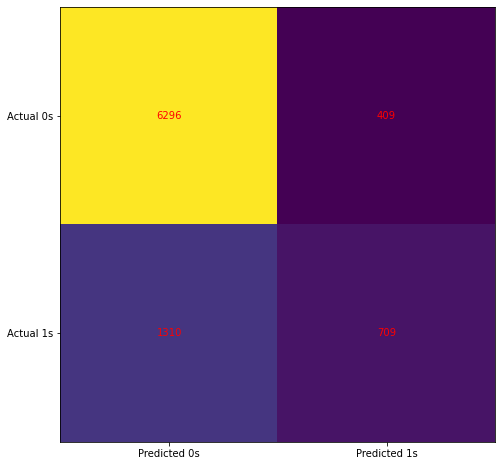

In [33]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

## <span style="color:CadetBlue"> Matriz de confusión y estadísticos de validación.</span>

In [34]:
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    y_pred,
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix

Predicción,0,1
Real,,
0,6296,409
1,1310,709


In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      6705
           1       0.63      0.35      0.45      2019

    accuracy                           0.80      8724
   macro avg       0.73      0.65      0.67      8724
weighted avg       0.78      0.80      0.78      8724



### <span style="color:CadetBlue"> * Dado la precisión del modelo, indica que el 63% de los estudiantes que el modelo indicó como interesados en una beca o en pasar a la Universidad Nacional, ingresarán a dicha universidad o serán becados</span>

### <span style="color:CadetBlue"> * Dado el Recall del modelo, indica que el 35% de los estudiantes que tienen puntajes mayores a 350, el modelo los identifica</span>


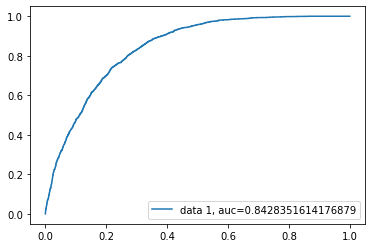

In [36]:
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


### <span style="color:CadetBlue"> * Dado que el modelo es un modelo desbalanceado ya que el 22.4% de los casos son puntajes mayores a 350, es muy importante revisar el AUC=84% que nos indica que el modelo es muy bueno en distinguir la probabilidad de que un estudiante sea becado o admitido a la Universidad Nacional o ser becado.</span>

# <span style="color:green"> RESUMEN </span>

### <span style="color:CadetBlue"> * Se evidencia que de la base de datos compuesta por 29.080 datos, 6.504 datos cumplen la caracteristica de ser puntajes mayores a 6.504, es decir 22.4%.</span>

### <span style="color:CadetBlue"> * Dado la precisión del modelo, indica que el 63% de los estudiantes que el modelo indicó como interesados en una beca o en pasar a la Universidad Nacional, ingresarán a dicha universidad o serán becados.</span>

### <span style="color:CadetBlue"> * Dado el Recall del modelo, indica que el 35% de los estudiantes que tienen puntajes mayores a 350, el modelo los identifica.</span>

### <span style="color:CadetBlue"> *Dado que el modelo es un modelo desbalanceado ya que el 22.4% de los casos son puntajes mayores a 350, es muy importante revisar el AUC=84% que nos indica que el modelo es muy bueno en distinguir la probabilidad de que un estudiante sea becado o admitido a la Universidad Nacional o ser becado.</span>


# 4. Desarrollar una herramienta interactiva de análisis

Esta misión consiste en desarrollar una herramienta interactiva sencilla (que sea relevante en el contexto del problema) a partir de alguno de los análisis realizados en las secciones 2 o 3.

Pautas generales:
* Seleccionar uno de los análisis previos que pueda verse enriquecido con alguna característica de interactividad.
* Seleccionar los parámetros que el usuario podrá cambiar.
* Desarrollar las funciones que se deben ejecutar con cada acción del usuario.
* Utilizar los paquetes `ipywidgets` o `panel` para implementar la herramienta.

Pregunta guía:
* ¿Cuál(es) es la pregunta que el usuario podrá hacerle a la herramienta, y cómo aporta al análisis?
* ¿Qué aprendizajes clave puede explorar u obtener el usuario con esta herramienta basada en los datos?

El entregable de esta misión es la herramienta implementada, acompañada de las instrucciones necesarias para que un usuario la pueda utilizar.

# <span style="color:green"> Herramienta Interativa </span>

### <span style="color:CadetBlue"> * En esta Herramienta, la persona podra conocer como es la mediana, el primer cuartil, tercer cuartil de los datos según la variable categorica de interés.</span>

### <span style="color:CadetBlue"> * Tmabién podra navegar por las diferentes variables categoricas y saber cual son los puntos atipicos de estas..</span>

### <span style="color:CadetBlue"> * Podrá conocer que porcentajes de los estudiantes están distribuidos por las diferentes vahriables categoricas.</span>

### <span style="color:CadetBlue"> *Dado que el porcentaje a veces no puede reflejar el suceso en la frecuencia exacta, se genera la tercera visualización para que pueda ver que tanto casos estan clasificados en la categoria de escogencia.</span>


In [37]:
df_na_visual=df_na.drop(['PERIODO'], axis=1)
df_na_visual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29080 entries, 0 to 36588
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   ESTU_GENERO                   29080 non-null  object  
 1   ESTU_TIENEETNIA               29080 non-null  object  
 2   ESTU_DEPTO_RESIDE             29080 non-null  object  
 3   FAMI_ESTRATOVIVIENDA          29080 non-null  object  
 4   FAMI_PERSONASHOGAR            29080 non-null  object  
 5   FAMI_EDUCACIONPADRE           29080 non-null  object  
 6   FAMI_EDUCACIONMADRE           29080 non-null  object  
 7   FAMI_TRABAJOLABORPADRE        29080 non-null  object  
 8   FAMI_TRABAJOLABORMADRE        29080 non-null  object  
 9   FAMI_TIENEINTERNET            29080 non-null  object  
 10  FAMI_TIENEMOTOCICLETA         29080 non-null  object  
 11  FAMI_NUMLIBROS                29080 non-null  object  
 12  FAMI_COMELECHEDERIVADOS       29080 non-null  

In [38]:
def copiar_df (df):
    return df.copy()

df_v = copiar_df(df_na_visual) # Cambiar por base completa si es necesario 
Variables=[i for i in df_v.drop(['PUNT_GLOBAL'], axis = 1, inplace = False).columns]
Variables.insert(0,"COLE_JORNADA")


In [39]:
def filtrar(Variables, Puntaje):
    df = df_v
    if Variables != "Todos": 
        plt.figure(figsize = (6,6))
        display(sns.boxplot( y = Variables   , x = "PUNT_GLOBAL" , data=df , order = sorted(df[Variables].unique().tolist()) ));
        plt.show()
        display(df[(df["PUNT_GLOBAL"] <= Puntaje)][Variables].groupby(df[Variables]).count().plot(kind="pie", autopct='%.2f%%', figsize = (6,6)))
        plt.title(str(Variables) + "- PUNTAJE GLOBAL ")
        plt.show()
        display(df[(df["PUNT_GLOBAL"] <= Puntaje)][Variables].groupby(df[Variables]).count().plot(kind="bar", figsize = (6,6)))
        plt.title(str(Variables) + "- PUNTAJE GLOBAL ")
        plt.show()
    else:
        plt.figure(figsize = (4,3))
        display(sns.boxplot( y = Variables   , x = "PUNT_GLOBAL" , data=df , order = sorted(df[Variables].unique().tolist()) ));
        plt.title("Puntaje global")
        plt.xlabel('Puntaje')
        plt.ylabel('Densidad')
        plt.show();
 
interactive_plot = interactive(
                                filtrar, 
                                Variables = Variables,
                                Puntaje = (df_v["PUNT_GLOBAL"].min(), df_v["PUNT_GLOBAL"].max(), 50) 
                                
                              )

In [40]:
display(interactive_plot)

interactive(children=(Dropdown(description='Variables', options=('COLE_JORNADA', 'ESTU_GENERO', 'ESTU_TIENEETN…